# 01__preprocess
# turn files of counts into large dataframe of counts
in this notebook, I load in the barcode counts that we got from the .fastq files and put everything in one nice dataframe. additionally, I filter the barcodes to only include those that have >= 5 reads in a given sample, and then filter them again to only include those that correspond to TSSs (elements) for which we have at least 3 barcodes represented.

- throughout these notebooks, "pool1" refers to the TSS pool, while "pool2" refers to the deletion pool
- pool1 was performed in HepG2, HeLa, and K562; pool2 was performed in HepG2 and K562

------

figures in this notebook:
- **Fig S7A**: heatmap of barcode count correlation between replicates

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import sys

# import utils
sys.path.append("../../utils")
from plotting_utils import *

%matplotlib inline

In [2]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

## functions

In [3]:
def import_dna(counts_dir, dna_f):
    dna_dfs = []
    for i in range(len(dna_f)):
        f = dna_f[i]
        cols = ["barcode", "dna_%s" % (i+1)]
        tmp = pd.read_table("%s/%s" % (counts_dir, f), sep="\t", header=None)
        tmp.columns = cols
        dna_dfs.append(tmp)
    if len(dna_dfs) > 1:
        dna = reduce(lambda x, y: pd.merge(x, y, on = "barcode"), dna_dfs)
    else:
        dna = dna_dfs[0]
    return dna

In [4]:
def import_rna(counts_dir, rna_f, dna):
    data = dna.copy()
    data_cols = list(dna.columns)
    for f in rna_f:
        rep = re.findall(r'\d+', f.split("__")[3])[0]
        tmp = pd.read_table("%s/%s" % (counts_dir, f), sep="\t", header=None)
        tmp.columns = ["barcode", "rna_%s" % rep]
        data_cols.append("rna_%s" % rep)
        data = data.merge(tmp, on="barcode", how="outer")
    return data, data_cols

## variables

In [5]:
counts_dir = "../../data/01__counts"

In [6]:
barcode_dna_read_threshold = 5
barcode_rna_read_threshold = 5
n_barcodes_per_elem_threshold = 3

### DNA files

In [7]:
pool1_pMPRA1_dna_f = ["POOL1__pMPRA1__COUNTS.txt"]
pool1_pNoCMVMPRA1_dna_f = ["POOL1__pNoCMVMPRA1__COUNTS.txt"]
pool2_pMPRA1_dna_f = ["POOL2__pMPRA1__COUNTS.txt"]

### RNA files

In [8]:
pool1_pMPRA1_HeLa_rna_f = ["POOL1__pMPRA1__HeLa__rep1__COUNTS.txt",
                           "POOL1__pMPRA1__HeLa__rep2__COUNTS.txt",
                           "POOL1__pMPRA1__HeLa__rep3__COUNTS.txt", 
                           "POOL1__pMPRA1__HeLa__rep4__COUNTS.txt"]
pool1_pMPRA1_HeLa_out_f = "POOL1__pMPRA1__HeLa__all_counts.txt"

In [9]:
pool1_pMPRA1_HepG2_rna_f = ["POOL1__pMPRA1__HepG2__rep3__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep4__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep5__COUNTS.txt", 
                            "POOL1__pMPRA1__HepG2__rep6__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep7__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep8__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep9__COUNTS.txt", 
                            "POOL1__pMPRA1__HepG2__rep10__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep11__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep12__COUNTS.txt",
                            "POOL1__pMPRA1__HepG2__rep13__COUNTS.txt", 
                            "POOL1__pMPRA1__HepG2__rep14__COUNTS.txt"]
pool1_pMPRA1_HepG2_out_f = "POOL1__pMPRA1__HepG2__all_counts.txt"

In [10]:
pool1_pMPRA1_K562_rna_f = ["POOL1__pMPRA1__K562__rep1__COUNTS.txt",
                           "POOL1__pMPRA1__K562__rep2__COUNTS.txt",
                           "POOL1__pMPRA1__K562__rep3__COUNTS.txt", 
                           "POOL1__pMPRA1__K562__rep4__COUNTS.txt"]
pool1_pMPRA1_K562_out_f = "POOL1__pMPRA1__K562__all_counts.txt"

In [11]:
pool1_pNoCMVMPRA1_HeLa_rna_f = ["POOL1__pNoCMVMPRA1__HeLa__rep1__COUNTS.txt",
                                "POOL1__pNoCMVMPRA1__HeLa__rep2__COUNTS.txt",
                                "POOL1__pNoCMVMPRA1__HeLa__rep3__COUNTS.txt", 
                                "POOL1__pNoCMVMPRA1__HeLa__rep4__COUNTS.txt"]
pool1_pNoCMVMPRA1_HeLa_out_f = "POOL1__pNoCMVMPRA1__HeLa__all_counts.txt"

In [12]:
pool1_pNoCMVMPRA1_HepG2_rna_f = ["POOL1__pNoCMVMPRA1__HepG2__rep3__COUNTS.txt",
                                 "POOL1__pNoCMVMPRA1__HepG2__rep4__COUNTS.txt",
                                 "POOL1__pNoCMVMPRA1__HepG2__rep5__COUNTS.txt", 
                                 "POOL1__pNoCMVMPRA1__HepG2__rep6__COUNTS.txt"]
pool1_pNoCMVMPRA1_HepG2_out_f = "POOL1__pNoCMVMPRA1__HepG2__all_counts.txt"

In [13]:
pool1_pNoCMVMPRA1_K562_rna_f = ["POOL1__pNoCMVMPRA1__K562__rep1__COUNTS.txt",
                                "POOL1__pNoCMVMPRA1__K562__rep2__COUNTS.txt",
                                "POOL1__pNoCMVMPRA1__K562__rep3__COUNTS.txt", 
                                "POOL1__pNoCMVMPRA1__K562__rep4__COUNTS.txt"]
pool1_pNoCMVMPRA1_K562_out_f = "POOL1__pNoCMVMPRA1__K562__all_counts.txt"

In [14]:
pool2_pMPRA1_HepG2_rna_f = ["POOL2__pMPRA1__HepG2__rep3__COUNTS.txt",
                            "POOL2__pMPRA1__HepG2__rep4__COUNTS.txt",
                            "POOL2__pMPRA1__HepG2__rep5__COUNTS.txt", 
                            "POOL2__pMPRA1__HepG2__rep6__COUNTS.txt",
                            "POOL2__pMPRA1__HepG2__rep7__COUNTS.txt",
                            "POOL2__pMPRA1__HepG2__rep8__COUNTS.txt",
                            "POOL2__pMPRA1__HepG2__rep9__COUNTS.txt", 
                            "POOL2__pMPRA1__HepG2__rep10__COUNTS.txt"]
pool2_pMPRA1_HepG2_out_f = "POOL2__pMPRA1__HepG2__all_counts.txt"

In [15]:
pool2_pMPRA1_K562_rna_f = ["POOL2__pMPRA1__K562__rep1__COUNTS.txt",
                           "POOL2__pMPRA1__K562__rep2__COUNTS.txt",
                           "POOL2__pMPRA1__K562__rep3__COUNTS.txt", 
                           "POOL2__pMPRA1__K562__rep4__COUNTS.txt"]
pool2_pMPRA1_K562_out_f = "POOL2__pMPRA1__K562__all_counts.txt"

### Index Files

In [16]:
pool1_index_f = "../../data/00__index/tss_oligo_pool.index.txt"
pool2_index_f = "../../data/00__index/dels_oligo_pool.index.txt"

## 1. import indexes

In [17]:
pool1_index = pd.read_table(pool1_index_f, sep="\t")
pool2_index = pd.read_table(pool2_index_f, sep="\t")
pool1_index.head()

,full_oligo,oligo_type,oligo_id,dupe_info,seq_name,tile_name,chr,locus_start,locus_end,strand,...,tile_number,local_start,local_end,RE_count_1,RE_count_2,RE_count_3,SNP,barcode,element,unique_id
0,ACTGGCCGCTTCACTGGTGCAGCCCAGGCGTTTCCGGGTTCCCGCG...,WILDTYPE,1.1.0.0.1,none,"Antisense.noflip.NA__chr1:100435456..100435570,-",Antisense.noflip.NA__chr1:100435456..100435570...,chr1,100435456.0,100435570.0,-,...,1.0,0.0,114.0,1,1,0,none,CTCGTAACGGG,GTGCAGCCCAGGCGTTTCCGGGTTCCCGCGGTCCCGTCCCCCAAAT...,WILDTYPE__Antisense.noflip.NA__chr1:100435456....
1,ACTGGCCGCTTCACTGGTGCAGCCCAGGCGTTTCCGGGTTCCCGCG...,WILDTYPE,1.1.0.0.2,none,"Antisense.noflip.NA__chr1:100435456..100435570,-",Antisense.noflip.NA__chr1:100435456..100435570...,chr1,100435456.0,100435570.0,-,...,1.0,0.0,114.0,1,1,0,none,ATACGCGATTG,GTGCAGCCCAGGCGTTTCCGGGTTCCCGCGGTCCCGTCCCCCAAAT...,WILDTYPE__Antisense.noflip.NA__chr1:100435456....
2,ACTGGCCGCTTCACTGGTGCAGCCCAGGCGTTTCCGGGTTCCCGCG...,WILDTYPE,1.1.0.0.3,none,"Antisense.noflip.NA__chr1:100435456..100435570,-",Antisense.noflip.NA__chr1:100435456..100435570...,chr1,100435456.0,100435570.0,-,...,1.0,0.0,114.0,1,1,0,none,GAAACGTAAGT,GTGCAGCCCAGGCGTTTCCGGGTTCCCGCGGTCCCGTCCCCCAAAT...,WILDTYPE__Antisense.noflip.NA__chr1:100435456....
3,ACTGGCCGCTTCACTGGTGCAGCCCAGGCGTTTCCGGGTTCCCGCG...,WILDTYPE,1.1.0.0.4,none,"Antisense.noflip.NA__chr1:100435456..100435570,-",Antisense.noflip.NA__chr1:100435456..100435570...,chr1,100435456.0,100435570.0,-,...,1.0,0.0,114.0,1,1,0,none,GTACTAAGAGT,GTGCAGCCCAGGCGTTTCCGGGTTCCCGCGGTCCCGTCCCCCAAAT...,WILDTYPE__Antisense.noflip.NA__chr1:100435456....
4,ACTGGCCGCTTCACTGGTGCAGCCCAGGCGTTTCCGGGTTCCCGCG...,WILDTYPE,1.1.0.0.5,none,"Antisense.noflip.NA__chr1:100435456..100435570,-",Antisense.noflip.NA__chr1:100435456..100435570...,chr1,100435456.0,100435570.0,-,...,1.0,0.0,114.0,1,1,0,none,ACTTTCCGACG,GTGCAGCCCAGGCGTTTCCGGGTTCCCGCGGTCCCGTCCCCCAAAT...,WILDTYPE__Antisense.noflip.NA__chr1:100435456....


## 2. import dna

In [18]:
pool1_pMPRA1_dna = import_dna(counts_dir, pool1_pMPRA1_dna_f)
pool1_pMPRA1_dna.head()

,barcode,dna_1
0,ACGACTTACTT,26
1,CCTAAAGAATC,801
2,ACCCGAGAATG,385
3,ACTTACTACGA,112
4,ACGCTTATGTG,80


In [19]:
pool1_pNoCMVMPRA1_dna = import_dna(counts_dir, pool1_pNoCMVMPRA1_dna_f)
pool1_pNoCMVMPRA1_dna.head()

,barcode,dna_1
0,ATGTAAACACA,833
1,ATTCTATTCGC,532
2,AGTTCGAGTGC,1287
3,TTATCGGAACC,132
4,AGCCAATACTA,67


In [20]:
pool2_pMPRA1_dna = import_dna(counts_dir, pool2_pMPRA1_dna_f)
pool2_pMPRA1_dna.head()

,barcode,dna_1
0,AATAGCAGCGC,192
1,CTGCGTGATCG,9
2,ACGCATTGGCT,32
3,ATTGATTATGC,158
4,CATCGAACCTG,733


## 3. import rna

In [21]:
pool1_pMPRA1_HeLa_data, pool1_pMPRA1_HeLa_cols = import_rna(counts_dir, pool1_pMPRA1_HeLa_rna_f, pool1_pMPRA1_dna)
pool1_pMPRA1_HeLa_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ACGACTTACTT,26.0,NaN,NaN,NaN,1.0
1,CCTAAAGAATC,801.0,355.0,1.0,26.0,6.0
2,ACCCGAGAATG,385.0,760.0,2.0,NaN,NaN
3,ACTTACTACGA,112.0,1240.0,3040.0,1560.0,2626.0
4,ACGCTTATGTG,80.0,NaN,NaN,NaN,118.0


In [22]:
pool1_pMPRA1_HepG2_data, pool1_pMPRA1_HepG2_cols = import_rna(counts_dir, pool1_pMPRA1_HepG2_rna_f, pool1_pMPRA1_dna)
pool1_pMPRA1_HepG2_data.head()

,barcode,dna_1,rna_3,rna_4,rna_5,rna_6,rna_7,rna_8,rna_9,rna_10,rna_11,rna_12,rna_13,rna_14
0,ACGACTTACTT,26.0,5.0,36.0,2.0,3.0,8.0,2.0,91.0,24.0,7.0,9.0,7.0,18.0
1,CCTAAAGAATC,801.0,341.0,579.0,733.0,546.0,656.0,1118.0,677.0,960.0,1124.0,683.0,825.0,848.0
2,ACCCGAGAATG,385.0,699.0,1528.0,1213.0,1261.0,951.0,1858.0,1239.0,1266.0,1766.0,1310.0,1431.0,1846.0
3,ACTTACTACGA,112.0,420.0,766.0,717.0,774.0,535.0,1331.0,779.0,787.0,732.0,769.0,659.0,1140.0
4,ACGCTTATGTG,80.0,29.0,106.0,83.0,146.0,36.0,218.0,75.0,112.0,50.0,122.0,69.0,108.0


In [23]:
pool1_pMPRA1_K562_data, pool1_pMPRA1_K562_cols = import_rna(counts_dir, pool1_pMPRA1_K562_rna_f, pool1_pMPRA1_dna)
pool1_pMPRA1_K562_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ACGACTTACTT,26.0,NaN,NaN,NaN,NaN
1,CCTAAAGAATC,801.0,563.0,1030.0,605.0,1217.0
2,ACCCGAGAATG,385.0,316.0,829.0,391.0,873.0
3,ACTTACTACGA,112.0,1139.0,1297.0,741.0,814.0
4,ACGCTTATGTG,80.0,NaN,NaN,170.0,62.0


In [24]:
pool1_pNoCMVMPRA1_HeLa_data, pool1_pNoCMVMPRA1_HeLa_cols = import_rna(counts_dir, pool1_pNoCMVMPRA1_HeLa_rna_f, pool1_pNoCMVMPRA1_dna)
pool1_pNoCMVMPRA1_HeLa_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ATGTAAACACA,833.0,1.0,3053.0,NaN,13.0
1,ATTCTATTCGC,532.0,NaN,1.0,NaN,NaN
2,AGTTCGAGTGC,1287.0,NaN,456.0,NaN,NaN
3,TTATCGGAACC,132.0,2.0,NaN,NaN,NaN
4,AGCCAATACTA,67.0,NaN,NaN,NaN,NaN


In [25]:
pool1_pNoCMVMPRA1_HepG2_data, pool1_pNoCMVMPRA1_HepG2_cols = import_rna(counts_dir, pool1_pNoCMVMPRA1_HepG2_rna_f, pool1_pNoCMVMPRA1_dna)
pool1_pNoCMVMPRA1_HepG2_data.head()

,barcode,dna_1,rna_3,rna_4,rna_5,rna_6
0,ATGTAAACACA,833.0,91.0,24.0,353.0,347.0
1,ATTCTATTCGC,532.0,9.0,11.0,NaN,46.0
2,AGTTCGAGTGC,1287.0,264.0,329.0,705.0,806.0
3,TTATCGGAACC,132.0,3.0,18.0,NaN,NaN
4,AGCCAATACTA,67.0,9.0,NaN,NaN,NaN


In [26]:
pool1_pNoCMVMPRA1_K562_data, pool1_pNoCMVMPRA1_K562_cols = import_rna(counts_dir, pool1_pNoCMVMPRA1_K562_rna_f, pool1_pNoCMVMPRA1_dna)
pool1_pNoCMVMPRA1_K562_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ATGTAAACACA,833.0,344.0,148.0,75.0,140.0
1,ATTCTATTCGC,532.0,9.0,122.0,12.0,73.0
2,AGTTCGAGTGC,1287.0,1332.0,651.0,908.0,919.0
3,TTATCGGAACC,132.0,1.0,18.0,NaN,NaN
4,AGCCAATACTA,67.0,93.0,84.0,NaN,NaN


In [27]:
pool2_pMPRA1_HepG2_data, pool2_pMPRA1_HepG2_cols = import_rna(counts_dir, pool2_pMPRA1_HepG2_rna_f, pool2_pMPRA1_dna)
pool2_pMPRA1_HepG2_data.head()

,barcode,dna_1,rna_3,rna_4,rna_5,rna_6,rna_7,rna_8,rna_9,rna_10
0,AATAGCAGCGC,192.0,40.0,126.0,103.0,180.0,78.0,141.0,217.0,134.0
1,CTGCGTGATCG,9.0,3.0,4.0,NaN,1.0,NaN,NaN,10.0,NaN
2,ACGCATTGGCT,32.0,7.0,40.0,4.0,59.0,1.0,32.0,3.0,19.0
3,ATTGATTATGC,158.0,727.0,1813.0,1578.0,2188.0,3051.0,2723.0,2722.0,2104.0
4,CATCGAACCTG,733.0,142.0,250.0,442.0,634.0,206.0,355.0,539.0,313.0


In [28]:
pool2_pMPRA1_K562_data, pool2_pMPRA1_K562_cols = import_rna(counts_dir, pool2_pMPRA1_K562_rna_f, pool2_pMPRA1_dna)
pool2_pMPRA1_K562_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,AATAGCAGCGC,192.0,77.0,6.0,NaN,NaN
1,CTGCGTGATCG,9.0,NaN,2.0,NaN,2.0
2,ACGCATTGGCT,32.0,4.0,2.0,2.0,4.0
3,ATTGATTATGC,158.0,1377.0,3185.0,329.0,2010.0
4,CATCGAACCTG,733.0,83.0,484.0,24.0,41.0


## 4. filter barcodes

In [29]:
pool1_pMPRA1_HeLa_data = pool1_pMPRA1_HeLa_data.fillna(0)
pool1_pMPRA1_HepG2_data = pool1_pMPRA1_HepG2_data.fillna(0)
pool1_pMPRA1_K562_data = pool1_pMPRA1_K562_data.fillna(0)
pool1_pNoCMVMPRA1_HeLa_data = pool1_pNoCMVMPRA1_HeLa_data.fillna(0)
pool1_pNoCMVMPRA1_HepG2_data = pool1_pNoCMVMPRA1_HepG2_data.fillna(0)
pool1_pNoCMVMPRA1_K562_data = pool1_pNoCMVMPRA1_K562_data.fillna(0)
pool2_pMPRA1_HepG2_data = pool2_pMPRA1_HepG2_data.fillna(0)
pool2_pMPRA1_K562_data = pool2_pMPRA1_K562_data.fillna(0)

In [30]:
pool1_pMPRA1_HeLa_data.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ACGACTTACTT,26.0,0.0,0.0,0.0,1.0
1,CCTAAAGAATC,801.0,355.0,1.0,26.0,6.0
2,ACCCGAGAATG,385.0,760.0,2.0,0.0,0.0
3,ACTTACTACGA,112.0,1240.0,3040.0,1560.0,2626.0
4,ACGCTTATGTG,80.0,0.0,0.0,0.0,118.0


In [31]:
pool1_pMPRA1_HeLa_data_filt = pool1_pMPRA1_HeLa_data[pool1_pMPRA1_HeLa_data["dna_1"] >= barcode_dna_read_threshold]
pool1_pMPRA1_HepG2_data_filt = pool1_pMPRA1_HepG2_data[pool1_pMPRA1_HepG2_data["dna_1"] >= barcode_dna_read_threshold]
pool1_pMPRA1_K562_data_filt = pool1_pMPRA1_K562_data[pool1_pMPRA1_K562_data["dna_1"] >= barcode_dna_read_threshold]
pool1_pNoCMVMPRA1_HeLa_data_filt = pool1_pNoCMVMPRA1_HeLa_data[pool1_pNoCMVMPRA1_HeLa_data["dna_1"] >= barcode_dna_read_threshold]
pool1_pNoCMVMPRA1_HepG2_data_filt = pool1_pNoCMVMPRA1_HepG2_data[pool1_pNoCMVMPRA1_HepG2_data["dna_1"] >= barcode_dna_read_threshold]
pool1_pNoCMVMPRA1_K562_data_filt = pool1_pNoCMVMPRA1_K562_data[pool1_pNoCMVMPRA1_K562_data["dna_1"] >= barcode_dna_read_threshold]
pool2_pMPRA1_HepG2_data_filt = pool2_pMPRA1_HepG2_data[pool2_pMPRA1_HepG2_data["dna_1"] >= barcode_dna_read_threshold]
pool2_pMPRA1_K562_data_filt = pool2_pMPRA1_K562_data[pool2_pMPRA1_K562_data["dna_1"] >= barcode_dna_read_threshold]

In [32]:
pool1_pMPRA1_HeLa_reps = [x for x in pool1_pMPRA1_HeLa_data_filt.columns if "rna_" in x]
pool1_pMPRA1_HepG2_reps = [x for x in pool1_pMPRA1_HepG2_data_filt.columns if "rna_" in x]
pool1_pMPRA1_K562_reps = [x for x in pool1_pMPRA1_K562_data_filt.columns if "rna_" in x]
pool1_pNoCMVMPRA1_HeLa_reps = [x for x in pool1_pNoCMVMPRA1_HeLa_data_filt.columns if "rna_" in x]
pool1_pNoCMVMPRA1_HepG2_reps = [x for x in pool1_pNoCMVMPRA1_HepG2_data_filt.columns if "rna_" in x]
pool1_pNoCMVMPRA1_K562_reps = [x for x in pool1_pNoCMVMPRA1_K562_data_filt.columns if "rna_" in x]
pool2_pMPRA1_HepG2_reps = [x for x in pool2_pMPRA1_HepG2_data_filt.columns if "rna_" in x]
pool2_pMPRA1_K562_reps = [x for x in pool2_pMPRA1_K562_data_filt.columns if "rna_" in x]

In [33]:
pool1_pMPRA1_HeLa_data_filt[pool1_pMPRA1_HeLa_reps] = pool1_pMPRA1_HeLa_data_filt[pool1_pMPRA1_HeLa_data_filt > barcode_rna_read_threshold][pool1_pMPRA1_HeLa_reps]
pool1_pMPRA1_HepG2_data_filt[pool1_pMPRA1_HepG2_reps] = pool1_pMPRA1_HepG2_data_filt[pool1_pMPRA1_HepG2_data_filt > barcode_rna_read_threshold][pool1_pMPRA1_HepG2_reps]
pool1_pMPRA1_K562_data_filt[pool1_pMPRA1_K562_reps] = pool1_pMPRA1_K562_data_filt[pool1_pMPRA1_K562_data_filt > barcode_rna_read_threshold][pool1_pMPRA1_K562_reps]
pool1_pNoCMVMPRA1_HeLa_data_filt[pool1_pNoCMVMPRA1_HeLa_reps] = pool1_pNoCMVMPRA1_HeLa_data_filt[pool1_pNoCMVMPRA1_HeLa_data_filt > barcode_rna_read_threshold][pool1_pNoCMVMPRA1_HeLa_reps]
pool1_pNoCMVMPRA1_HepG2_data_filt[pool1_pNoCMVMPRA1_HepG2_reps] = pool1_pNoCMVMPRA1_HepG2_data_filt[pool1_pNoCMVMPRA1_HepG2_data_filt > barcode_rna_read_threshold][pool1_pNoCMVMPRA1_HepG2_reps]
pool1_pNoCMVMPRA1_K562_data_filt[pool1_pNoCMVMPRA1_K562_reps] = pool1_pNoCMVMPRA1_K562_data_filt[pool1_pNoCMVMPRA1_K562_data_filt > barcode_rna_read_threshold][pool1_pNoCMVMPRA1_K562_reps]
pool2_pMPRA1_HepG2_data_filt[pool2_pMPRA1_HepG2_reps] = pool2_pMPRA1_HepG2_data_filt[pool2_pMPRA1_HepG2_data_filt > barcode_rna_read_threshold][pool2_pMPRA1_HepG2_reps]
pool2_pMPRA1_K562_data_filt[pool2_pMPRA1_K562_reps] = pool2_pMPRA1_K562_data_filt[pool2_pMPRA1_K562_data_filt > barcode_rna_read_threshold][pool2_pMPRA1_K562_reps]
pool1_pMPRA1_HeLa_data_filt.head()

,barcode,dna_1,rna_1,rna_2,rna_3,rna_4
0,ACGACTTACTT,26.0,NaN,NaN,NaN,NaN
1,CCTAAAGAATC,801.0,355.0,NaN,26.0,6.0
2,ACCCGAGAATG,385.0,760.0,NaN,NaN,NaN
3,ACTTACTACGA,112.0,1240.0,3040.0,1560.0,2626.0
4,ACGCTTATGTG,80.0,NaN,NaN,NaN,118.0


In [34]:
all_names = ["pool1_pMPRA1_HeLa", "pool1_pMPRA1_HepG2", "pool1_pMPRA1_K562", "pool1_pNoCMVMPRA1_HeLa",
             "pool1_pNoCMVMPRA1_HepG2", "pool1_pNoCMVMPRA1_K562", "pool2_pMPRA1_HepG2", "pool2_pMPRA1_K562"]

all_dfs = [pool1_pMPRA1_HeLa_data_filt, pool1_pMPRA1_HepG2_data_filt, pool1_pMPRA1_K562_data_filt,
           pool1_pNoCMVMPRA1_HeLa_data_filt, pool1_pNoCMVMPRA1_HepG2_data_filt, pool1_pNoCMVMPRA1_K562_data_filt,
           pool2_pMPRA1_HepG2_data_filt, pool2_pMPRA1_K562_data_filt]

all_cols = [pool1_pMPRA1_HeLa_cols, pool1_pMPRA1_HepG2_cols, pool1_pMPRA1_K562_cols,
            pool1_pNoCMVMPRA1_HeLa_cols, pool1_pNoCMVMPRA1_HepG2_cols, pool1_pNoCMVMPRA1_K562_cols,
            pool2_pMPRA1_HepG2_cols, pool2_pMPRA1_K562_cols]

print("FILTERING RESULTS:")
for n, df, cs in zip(all_names, all_dfs, all_cols):
    if "pool1" in n:
        index_len = len(pool1_index)
    elif "pool2" in n:
        index_len = len(pool2_index)
        
    dna_barc_len = len(df)
    dna_barc_perc = (float(dna_barc_len)/index_len)*100
    
    print("%s: from %s barcodes to %s at DNA level (%s%%)" % (n, index_len, dna_barc_len, dna_barc_perc))
    
    reps = [x for x in cs if "rna_" in x]
    
    for r in reps:
        rep = r.split("_")[1]
        
        rna_barc_len = sum(~pd.isnull(df[r]))
        rna_barc_perc = (float(rna_barc_len)/index_len)*100
        
        print("\trep %s: %s barcodes at RNA level (%s%%)" % (rep, rna_barc_len, rna_barc_perc))
    print("")

FILTERING RESULTS:
pool1_pMPRA1_HeLa: from 120000 barcodes to 104972 at DNA level (87.47666666666667%)
	rep 1: 42917 barcodes at RNA level (35.76416666666667%)
	rep 2: 36384 barcodes at RNA level (30.320000000000004%)
	rep 3: 34235 barcodes at RNA level (28.529166666666665%)
	rep 4: 34563 barcodes at RNA level (28.8025%)

pool1_pMPRA1_HepG2: from 120000 barcodes to 104972 at DNA level (87.47666666666667%)
	rep 3: 97325 barcodes at RNA level (81.10416666666667%)
	rep 4: 100382 barcodes at RNA level (83.65166666666667%)
	rep 5: 96451 barcodes at RNA level (80.37583333333333%)
	rep 6: 94855 barcodes at RNA level (79.04583333333333%)
	rep 7: 97024 barcodes at RNA level (80.85333333333334%)
	rep 8: 97224 barcodes at RNA level (81.02000000000001%)
	rep 9: 96321 barcodes at RNA level (80.2675%)
	rep 10: 98550 barcodes at RNA level (82.125%)
	rep 11: 97920 barcodes at RNA level (81.6%)
	rep 12: 97973 barcodes at RNA level (81.64416666666666%)
	rep 13: 97916 barcodes at RNA level (81.5966666666

## 5. join with index

In [35]:
pool1_pMPRA1_HeLa_data_filt = pool1_pMPRA1_HeLa_data_filt.merge(pool1_index, on="barcode", how="inner")
pool1_pMPRA1_HepG2_data_filt = pool1_pMPRA1_HepG2_data_filt.merge(pool1_index, on="barcode", how="inner")
pool1_pMPRA1_K562_data_filt = pool1_pMPRA1_K562_data_filt.merge(pool1_index, on="barcode", how="inner")

In [36]:
pool1_pNoCMVMPRA1_HeLa_data_filt = pool1_pNoCMVMPRA1_HeLa_data_filt.merge(pool1_index, on="barcode", how="inner")
pool1_pNoCMVMPRA1_HepG2_data_filt = pool1_pNoCMVMPRA1_HepG2_data_filt.merge(pool1_index, on="barcode", how="inner")
pool1_pNoCMVMPRA1_K562_data_filt = pool1_pNoCMVMPRA1_K562_data_filt.merge(pool1_index, on="barcode", how="inner")

In [37]:
pool2_pMPRA1_HepG2_data_filt = pool2_pMPRA1_HepG2_data_filt.merge(pool2_index, on="barcode", how="inner")
pool2_pMPRA1_K562_data_filt = pool2_pMPRA1_K562_data_filt.merge(pool2_index, on="barcode", how="inner")

## 6. filter elements (remove ones with < 3 barcodes represented at dna level)

In [38]:
pool1_pMPRA1_HeLa_barcodes_per_elem = pool1_pMPRA1_HeLa_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pMPRA1_HeLa_barcodes_per_elem_neg = pool1_pMPRA1_HeLa_barcodes_per_elem[pool1_pMPRA1_HeLa_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg = pool1_pMPRA1_HeLa_barcodes_per_elem[~pool1_pMPRA1_HeLa_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg_filt = pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg[pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pMPRA1_HeLa_total_elems_rep = len(pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg)
pool1_pMPRA1_HeLa_total_elems_filt_rep = len(pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg_filt)

In [39]:
pool1_pMPRA1_HepG2_barcodes_per_elem = pool1_pMPRA1_HepG2_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pMPRA1_HepG2_barcodes_per_elem_neg = pool1_pMPRA1_HepG2_barcodes_per_elem[pool1_pMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg = pool1_pMPRA1_HepG2_barcodes_per_elem[~pool1_pMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg_filt = pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg[pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pMPRA1_HepG2_total_elems_rep = len(pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg)
pool1_pMPRA1_HepG2_total_elems_filt_rep = len(pool1_pMPRA1_HepG2_barcodes_per_elem_no_neg_filt)

In [40]:
pool1_pMPRA1_K562_barcodes_per_elem = pool1_pMPRA1_K562_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pMPRA1_K562_barcodes_per_elem_neg = pool1_pMPRA1_K562_barcodes_per_elem[pool1_pMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pMPRA1_K562_barcodes_per_elem_no_neg = pool1_pMPRA1_K562_barcodes_per_elem[~pool1_pMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pMPRA1_K562_barcodes_per_elem_no_neg_filt = pool1_pMPRA1_K562_barcodes_per_elem_no_neg[pool1_pMPRA1_K562_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pMPRA1_K562_total_elems_rep = len(pool1_pMPRA1_K562_barcodes_per_elem_no_neg)
pool1_pMPRA1_K562_total_elems_filt_rep = len(pool1_pMPRA1_K562_barcodes_per_elem_no_neg_filt)

In [41]:
pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem = pool1_pNoCMVMPRA1_HeLa_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_neg = pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem[pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg = pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem[~pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg_filt = pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg[pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pNoCMVMPRA1_HeLa_total_elems_rep = len(pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg)
pool1_pNoCMVMPRA1_HeLa_total_elems_filt_rep = len(pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg_filt)

In [42]:
pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem = pool1_pNoCMVMPRA1_HepG2_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_neg = pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem[pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg = pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem[~pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg_filt = pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg[pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pNoCMVMPRA1_HepG2_total_elems_rep = len(pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg)
pool1_pNoCMVMPRA1_HepG2_total_elems_filt_rep = len(pool1_pNoCMVMPRA1_HepG2_barcodes_per_elem_no_neg_filt)

In [43]:
pool1_pNoCMVMPRA1_K562_barcodes_per_elem = pool1_pNoCMVMPRA1_K562_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool1_pNoCMVMPRA1_K562_barcodes_per_elem_neg = pool1_pNoCMVMPRA1_K562_barcodes_per_elem[pool1_pNoCMVMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg = pool1_pNoCMVMPRA1_K562_barcodes_per_elem[~pool1_pNoCMVMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg_filt = pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg[pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool1_pNoCMVMPRA1_K562_total_elems_rep = len(pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg)
pool1_pNoCMVMPRA1_K562_total_elems_filt_rep = len(pool1_pNoCMVMPRA1_K562_barcodes_per_elem_no_neg_filt)

In [44]:
pool2_pMPRA1_HepG2_barcodes_per_elem = pool2_pMPRA1_HepG2_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool2_pMPRA1_HepG2_barcodes_per_elem_neg = pool2_pMPRA1_HepG2_barcodes_per_elem[pool2_pMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg = pool2_pMPRA1_HepG2_barcodes_per_elem[~pool2_pMPRA1_HepG2_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg_filt = pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg[pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool2_pMPRA1_HepG2_total_elems_rep = len(pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg)
pool2_pMPRA1_HepG2_total_elems_filt_rep = len(pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg_filt)

In [45]:
pool2_pMPRA1_K562_barcodes_per_elem = pool2_pMPRA1_K562_data_filt.groupby(["unique_id", "oligo_type"])["barcode"].agg("count").reset_index()
pool2_pMPRA1_K562_barcodes_per_elem_neg = pool2_pMPRA1_K562_barcodes_per_elem[pool2_pMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]
pool2_pMPRA1_K562_barcodes_per_elem_no_neg = pool2_pMPRA1_K562_barcodes_per_elem[~pool2_pMPRA1_K562_barcodes_per_elem["oligo_type"].isin(["RANDOM", "SCRAMBLED"])]

pool2_pMPRA1_K562_barcodes_per_elem_no_neg_filt = pool2_pMPRA1_K562_barcodes_per_elem_no_neg[pool2_pMPRA1_K562_barcodes_per_elem_no_neg["barcode"] >= n_barcodes_per_elem_threshold]
pool2_pMPRA1_K562_total_elems_rep = len(pool2_pMPRA1_K562_barcodes_per_elem_no_neg)
pool2_pMPRA1_K562_total_elems_filt_rep = len(pool2_pMPRA1_K562_barcodes_per_elem_no_neg_filt)

In [46]:
print("ELEMENT FILTERING RESULTS:")
print("Pool1 pMPRA1 HeLa: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pMPRA1_HeLa_total_elems_rep, pool1_pMPRA1_HeLa_total_elems_filt_rep,
                                                                                              n_barcodes_per_elem_threshold,
                                                                                              float(pool1_pMPRA1_HeLa_total_elems_filt_rep)/pool1_pMPRA1_HeLa_total_elems_rep*100))
print("Pool1 pMPRA1 HepG2: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pMPRA1_HepG2_total_elems_rep, pool1_pMPRA1_HepG2_total_elems_filt_rep,
                                                                                               n_barcodes_per_elem_threshold,
                                                                                               float(pool1_pMPRA1_HepG2_total_elems_filt_rep)/pool1_pMPRA1_HepG2_total_elems_rep*100))
print("Pool1 pMPRA1 K562: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pMPRA1_K562_total_elems_rep, pool1_pMPRA1_K562_total_elems_filt_rep,
                                                                                              n_barcodes_per_elem_threshold,
                                                                                              float(pool1_pMPRA1_K562_total_elems_filt_rep)/pool1_pMPRA1_K562_total_elems_rep*100))

print("")
print("Pool1 pNoCMVMPRA1 HeLa: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pNoCMVMPRA1_HeLa_total_elems_rep, pool1_pNoCMVMPRA1_HeLa_total_elems_filt_rep,
                                                                                                   n_barcodes_per_elem_threshold,
                                                                                                   float(pool1_pNoCMVMPRA1_HeLa_total_elems_filt_rep)/pool1_pNoCMVMPRA1_HeLa_total_elems_rep*100))
print("Pool1 pNoCMVMPRA1 HepG2: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pNoCMVMPRA1_HepG2_total_elems_rep, pool1_pNoCMVMPRA1_HepG2_total_elems_filt_rep,
                                                                                                    n_barcodes_per_elem_threshold,
                                                                                                    float(pool1_pNoCMVMPRA1_HepG2_total_elems_filt_rep)/pool1_pNoCMVMPRA1_HepG2_total_elems_rep*100))
print("Pool1 pNoCMVMPRA1 K562: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool1_pNoCMVMPRA1_K562_total_elems_rep, pool1_pNoCMVMPRA1_K562_total_elems_filt_rep,
                                                                                                   n_barcodes_per_elem_threshold,
                                                                                                   float(pool1_pNoCMVMPRA1_K562_total_elems_filt_rep)/pool1_pNoCMVMPRA1_K562_total_elems_rep*100))

print("")
print("Pool2 pMPRA1 HepG2: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool2_pMPRA1_HepG2_total_elems_rep, pool2_pMPRA1_HepG2_total_elems_filt_rep,
                                                                                               n_barcodes_per_elem_threshold,
                                                                                               float(pool2_pMPRA1_HepG2_total_elems_filt_rep)/pool2_pMPRA1_HepG2_total_elems_rep*100))
print("Pool2 pMPRA1 K562: filtered %s elements to %s represented at >= %s barcodes (%s%%)" % (pool2_pMPRA1_K562_total_elems_rep, pool2_pMPRA1_K562_total_elems_filt_rep,
                                                                                              n_barcodes_per_elem_threshold,
                                                                                              float(pool2_pMPRA1_K562_total_elems_filt_rep)/pool2_pMPRA1_K562_total_elems_rep*100))


ELEMENT FILTERING RESULTS:
Pool1 pMPRA1 HeLa: filtered 4560 elements to 4517 represented at >= 3 barcodes (99.05701754385964%)
Pool1 pMPRA1 HepG2: filtered 4560 elements to 4517 represented at >= 3 barcodes (99.05701754385964%)
Pool1 pMPRA1 K562: filtered 4560 elements to 4517 represented at >= 3 barcodes (99.05701754385964%)

Pool1 pNoCMVMPRA1 HeLa: filtered 4562 elements to 4539 represented at >= 3 barcodes (99.49583516001753%)
Pool1 pNoCMVMPRA1 HepG2: filtered 4562 elements to 4539 represented at >= 3 barcodes (99.49583516001753%)
Pool1 pNoCMVMPRA1 K562: filtered 4562 elements to 4539 represented at >= 3 barcodes (99.49583516001753%)

Pool2 pMPRA1 HepG2: filtered 4227 elements to 4225 represented at >= 3 barcodes (99.95268511947008%)
Pool2 pMPRA1 K562: filtered 4227 elements to 4225 represented at >= 3 barcodes (99.95268511947008%)


In [47]:
pool1_pMPRA1_good_elems = list(pool1_pMPRA1_HeLa_barcodes_per_elem_no_neg_filt["unique_id"]) + list(pool1_pMPRA1_HeLa_barcodes_per_elem_neg["unique_id"])
pool1_pNoCMVMPRA1_good_elems = list(pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_no_neg_filt["unique_id"]) + list(pool1_pNoCMVMPRA1_HeLa_barcodes_per_elem_neg["unique_id"])
pool2_pMPRA1_good_elems = list(pool2_pMPRA1_HepG2_barcodes_per_elem_no_neg_filt["unique_id"]) + list(pool2_pMPRA1_HepG2_barcodes_per_elem_neg["unique_id"])

In [48]:
pool1_pMPRA1_HeLa_data_filt = pool1_pMPRA1_HeLa_data_filt[pool1_pMPRA1_HeLa_data_filt["unique_id"].isin(pool1_pMPRA1_good_elems)]
pool1_pMPRA1_HepG2_data_filt = pool1_pMPRA1_HepG2_data_filt[pool1_pMPRA1_HepG2_data_filt["unique_id"].isin(pool1_pMPRA1_good_elems)]
pool1_pMPRA1_K562_data_filt = pool1_pMPRA1_K562_data_filt[pool1_pMPRA1_K562_data_filt["unique_id"].isin(pool1_pMPRA1_good_elems)]

pool1_pNoCMVMPRA1_HeLa_data_filt = pool1_pNoCMVMPRA1_HeLa_data_filt[pool1_pNoCMVMPRA1_HeLa_data_filt["unique_id"].isin(pool1_pNoCMVMPRA1_good_elems)]
pool1_pNoCMVMPRA1_HepG2_data_filt = pool1_pNoCMVMPRA1_HepG2_data_filt[pool1_pNoCMVMPRA1_HepG2_data_filt["unique_id"].isin(pool1_pNoCMVMPRA1_good_elems)]
pool1_pNoCMVMPRA1_K562_data_filt = pool1_pNoCMVMPRA1_K562_data_filt[pool1_pNoCMVMPRA1_K562_data_filt["unique_id"].isin(pool1_pNoCMVMPRA1_good_elems)]

pool2_pMPRA1_HepG2_data_filt = pool2_pMPRA1_HepG2_data_filt[pool2_pMPRA1_HepG2_data_filt["unique_id"].isin(pool2_pMPRA1_good_elems)]
pool2_pMPRA1_K562_data_filt = pool2_pMPRA1_K562_data_filt[pool2_pMPRA1_K562_data_filt["unique_id"].isin(pool2_pMPRA1_good_elems)]

## 5. write final file

In [49]:
pool1_pMPRA1_HeLa_counts = pool1_pMPRA1_HeLa_data_filt[pool1_pMPRA1_HeLa_cols]
pool1_pMPRA1_HepG2_counts = pool1_pMPRA1_HepG2_data_filt[pool1_pMPRA1_HepG2_cols]
pool1_pMPRA1_K562_counts = pool1_pMPRA1_K562_data_filt[pool1_pMPRA1_K562_cols]

pool1_pNoCMVMPRA1_HeLa_counts = pool1_pNoCMVMPRA1_HeLa_data_filt[pool1_pNoCMVMPRA1_HeLa_cols]
pool1_pNoCMVMPRA1_HepG2_counts = pool1_pNoCMVMPRA1_HepG2_data_filt[pool1_pNoCMVMPRA1_HepG2_cols]
pool1_pNoCMVMPRA1_K562_counts = pool1_pNoCMVMPRA1_K562_data_filt[pool1_pNoCMVMPRA1_K562_cols]

pool2_pMPRA1_HepG2_counts = pool2_pMPRA1_HepG2_data_filt[pool2_pMPRA1_HepG2_cols]
pool2_pMPRA1_K562_counts = pool2_pMPRA1_K562_data_filt[pool2_pMPRA1_K562_cols]

pool2_pMPRA1_HepG2_counts.head()

,barcode,dna_1,rna_3,rna_4,rna_5,rna_6,rna_7,rna_8,rna_9,rna_10
0,AATAGCAGCGC,192.0,40.0,126.0,103.0,180.0,78.0,141.0,217.0,134.0
1,CTGCGTGATCG,9.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2,ACGCATTGGCT,32.0,7.0,40.0,NaN,59.0,NaN,32.0,NaN,19.0
3,ATTGATTATGC,158.0,727.0,1813.0,1578.0,2188.0,3051.0,2723.0,2722.0,2104.0
4,CATCGAACCTG,733.0,142.0,250.0,442.0,634.0,206.0,355.0,539.0,313.0


In [50]:
pool1_pMPRA1_HeLa_counts.to_csv("%s/%s" % (counts_dir, pool1_pMPRA1_HeLa_out_f), sep="\t", header=True, index=False)
pool1_pMPRA1_HepG2_counts.to_csv("%s/%s" % (counts_dir, pool1_pMPRA1_HepG2_out_f), sep="\t", header=True, index=False)
pool1_pMPRA1_K562_counts.to_csv("%s/%s" % (counts_dir, pool1_pMPRA1_K562_out_f), sep="\t", header=True, index=False)

pool1_pNoCMVMPRA1_HeLa_counts.to_csv("%s/%s" % (counts_dir, pool1_pNoCMVMPRA1_HeLa_out_f), sep="\t", header=True, index=False)
pool1_pNoCMVMPRA1_HepG2_counts.to_csv("%s/%s" % (counts_dir, pool1_pNoCMVMPRA1_HepG2_out_f), sep="\t", header=True, index=False)
pool1_pNoCMVMPRA1_K562_counts.to_csv("%s/%s" % (counts_dir, pool1_pNoCMVMPRA1_K562_out_f), sep="\t", header=True, index=False)

pool2_pMPRA1_HepG2_counts.to_csv("%s/%s" % (counts_dir, pool2_pMPRA1_HepG2_out_f), sep="\t", header=True, index=False)
pool2_pMPRA1_K562_counts.to_csv("%s/%s" % (counts_dir, pool2_pMPRA1_K562_out_f), sep="\t", header=True, index=False)

## 6. heatmap comparing barcode counts

In [51]:
pool1_pMPRA1_HeLa_cols = ["barcode"]
pool1_pMPRA1_HepG2_cols = ["barcode"]
pool1_pMPRA1_K562_cols = ["barcode"]
pool1_pNoCMVMPRA1_HeLa_cols = ["barcode"]
pool1_pNoCMVMPRA1_HepG2_cols = ["barcode"]
pool1_pNoCMVMPRA1_K562_cols = ["barcode"]

In [52]:
pool1_pMPRA1_HeLa_cols.extend(["HeLa_%s" % x for x in pool1_pMPRA1_HeLa_reps])
pool1_pMPRA1_HepG2_cols.extend(["HepG2_%s" % x for x in pool1_pMPRA1_HepG2_reps])
pool1_pMPRA1_K562_cols.extend(["K562_%s" % x for x in pool1_pMPRA1_K562_reps])
pool1_pNoCMVMPRA1_HeLa_cols.extend(["HeLa_%s (no min. prom.)" % x for x in pool1_pNoCMVMPRA1_HeLa_reps])
pool1_pNoCMVMPRA1_HepG2_cols.extend(["HepG2_%s (no min. prom.)" % x for x in pool1_pNoCMVMPRA1_HepG2_reps])
pool1_pNoCMVMPRA1_K562_cols.extend(["K562_%s (no min. prom.)" % x for x in pool1_pNoCMVMPRA1_K562_reps])
pool1_pNoCMVMPRA1_K562_cols

['barcode',
 'K562_rna_1 (no min. prom.)',
 'K562_rna_2 (no min. prom.)',
 'K562_rna_3 (no min. prom.)',
 'K562_rna_4 (no min. prom.)']

In [53]:
pool1_pMPRA1_HeLa_counts.drop("dna_1", axis=1, inplace=True)
pool1_pMPRA1_HepG2_counts.drop("dna_1", axis=1, inplace=True)
pool1_pMPRA1_K562_counts.drop("dna_1", axis=1, inplace=True)
pool1_pNoCMVMPRA1_HeLa_counts.drop("dna_1", axis=1, inplace=True)
pool1_pNoCMVMPRA1_HepG2_counts.drop("dna_1", axis=1, inplace=True)
pool1_pNoCMVMPRA1_K562_counts.drop("dna_1", axis=1, inplace=True)

In [54]:
pool1_pMPRA1_HeLa_counts.columns = pool1_pMPRA1_HeLa_cols
pool1_pMPRA1_HepG2_counts.columns = pool1_pMPRA1_HepG2_cols
pool1_pMPRA1_K562_counts.columns = pool1_pMPRA1_K562_cols
pool1_pNoCMVMPRA1_HeLa_counts.columns = pool1_pNoCMVMPRA1_HeLa_cols
pool1_pNoCMVMPRA1_HepG2_counts.columns = pool1_pNoCMVMPRA1_HepG2_cols
pool1_pNoCMVMPRA1_K562_counts.columns = pool1_pNoCMVMPRA1_K562_cols

In [55]:
all_pool1 = pool1_pMPRA1_HeLa_counts.merge(pool1_pMPRA1_HepG2_counts, on="barcode").merge(pool1_pMPRA1_K562_counts, on = "barcode").merge(pool1_pNoCMVMPRA1_HeLa_counts, on="barcode").merge(pool1_pNoCMVMPRA1_HepG2_counts, on="barcode").merge(pool1_pNoCMVMPRA1_K562_counts, on="barcode")
all_pool1_corr = all_pool1.corr(method="pearson")

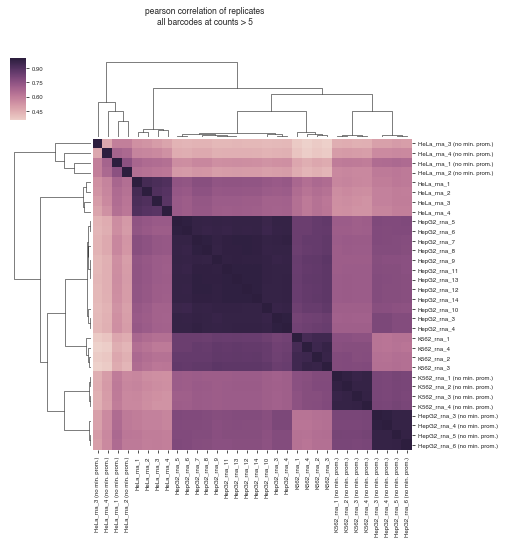

In [56]:
cmap = sns.cubehelix_palette(as_cmap=True)
cg = sns.clustermap(all_pool1_corr, figsize=(7.2,7.2), cmap=cmap, annot=False)
_ = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.suptitle("pearson correlation of replicates\nall barcodes at counts > 5")
cg.savefig("Fig_S7A.pdf", dpi="figure", transparent=True, bbox_inches="tight")